(a) Toy dataset : Two Spirals

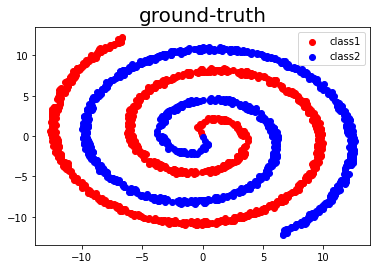

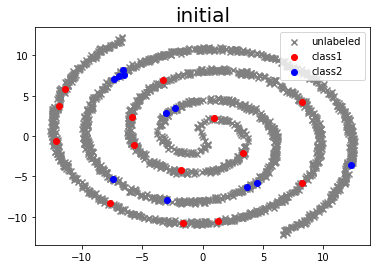

In [1]:
%matplotlib inline
import numpy as np
import math
import toydataset as dataset
import scatterutils
from scipy.spatial.distance import cdist
from scipy.linalg import fractional_matrix_power

n_points = 1000
n_labeled = 25  # in (0,n_points)
alpha = 0.99    # in (0,1)
sigma = 0.25
n_iteration = 400

# generate two spirals
X, ideal_Y = dataset.generate_spirals(n_points, 0.5)

# show ground-truth (ideal classification)
scatterutils.show_scatter_spirals(X, ideal_Y, 'ground-truth')

# select n-labeled data points randomly and use them as labeled data
Y = np.zeros_like(X)
initial_Y = np.zeros_like(ideal_Y)
random_y = np.random.randint(0, 2*n_points, n_labeled)
for i in range(0, n_labeled):
    index = random_y[i]
    Y[index, 0 if ideal_Y[index] == 1 else 1] = 1
    if index < n_points: initial_Y[index] = 1
    else: initial_Y[index] = 2

# show initial n_labeled
scatterutils.show_scatter_spirals(X, initial_Y, 'initial', True)

(b). Use the RBF kernel to construct an affinity matrix W.<br>
     W = exp(−∥xi − xj∥^2/2σ2) if i ̸= j and Wii = 0.

In [2]:
def rbf_kernel(x, y):
    distance = cdist(x, y, 'euclidean')
    return np.exp(-distance / (2 * math.pow(sigma, 2)))

W = rbf_kernel(X, X)
np.fill_diagonal(W, 0)

(c)-1. Construct the matrix S = D^(-1/2)WD^(-1/2).<br>
       D is a diagonal matrix with its (i, i)-element equal to the sum of the i-th row of W.

In [3]:
row_sum = np.sum(W, 1)
D = fractional_matrix_power(np.diag(row_sum), -0.5)
S = np.dot(np.dot(D, W), D)

(c)-2. Iterate F(t+1) = aSF(t)+(1-a)Y.<br>
       yi = argmaxj≤c Fij

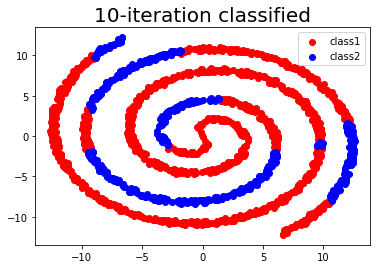

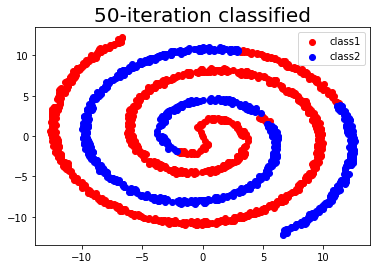

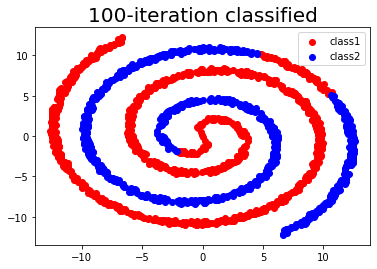

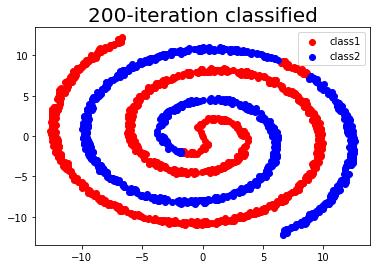

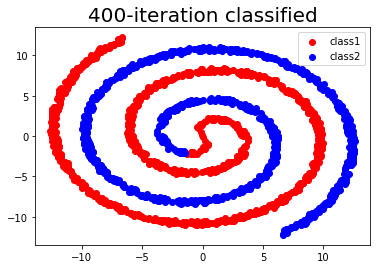

In [4]:
F = Y
func_F = lambda f : alpha * np.dot(S, f) + (1 - alpha) * Y

def show_result(n, f):
    result = np.ones_like(f)
    result[np.arange(len(f)), np.argmax(f, 1)] = 2
    result_y = np.array([y[1] for y in result])
    if n is None: title='classified'
    else: title=str(n)+'-iteration classified'
    scatterutils.show_scatter_spirals(X, result_y, title)

m = 50
for t in range(1, n_iteration+1):
    F = func_F(F)

    if t == 10:
        show_result(t, F)
    elif t == n_iteration:
        show_result(t, F)
    elif t % m == 0:
        m *= 2
        show_result(t, F)

(d) closed-form : F* = (I−αP)^(−1)Y

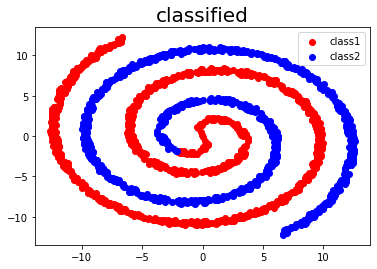

In [5]:
P = np.dot(np.dot(fractional_matrix_power(D, -0.5), S), fractional_matrix_power(D, 0.5))
I = np.eye(len(S))
F_star = np.dot(fractional_matrix_power((I - alpha * P), -1), Y)
show_result(None, F_star)